<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0922/blob/main/transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
f = zipfile.ZipFile("/content/drive/MyDrive/additional/train.zip")
f.extractall()

In [6]:
import glob
import pandas as pd
dogs = glob.glob("train/dog.*")
cats = glob.glob("train/cat.*")
df = pd.DataFrame({
    "path":dogs + cats,
    "ans":[0] * len(dogs) + [1] * len(cats)
})
df

,path,ans
0,train/dog.5450.jpg,0
1,train/dog.1933.jpg,0
2,train/dog.8744.jpg,0
3,train/dog.2438.jpg,0
4,train/dog.5943.jpg,0
...,...,...
24995,train/cat.8920.jpg,1
24996,train/cat.1859.jpg,1
24997,train/cat.8150.jpg,1
24998,train/cat.8976.jpg,1


In [26]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
cnn = VGG16(include_top=False, input_shape=(224, 224, 3))
for l in cnn.layers:
    l.trainable = False
layers = [
    GlobalAveragePooling2D(),
    Dense(2, activation="softmax")
]
model = Sequential(cnn.layers + layers)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [27]:
# y: 做one-hot encoding很耗費ram, 直接使用Sparse省RAM又方便
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

[[[ 64.061      55.221      53.32     ]
  [ 66.061      56.221      54.32     ]
  [ 61.060997   55.221      53.32     ]
  ...
  [ 95.061      95.221      90.32     ]
  [ 90.061      89.221      87.32     ]
  [ 88.061      85.221      88.32     ]]

 [[ 89.061      78.221      76.32     ]
  [ 92.061      82.221      81.32     ]
  [ 80.061      72.221      70.32     ]
  ...
  [ 90.061      90.221      84.32     ]
  [ 87.061      86.221      84.32     ]
  [ 93.061      90.221      93.32     ]]

 [[100.061      87.221      85.32     ]
  [101.061      88.221      87.32     ]
  [ 87.061      77.221      74.32     ]
  ...
  [ 93.061      94.221      89.32     ]
  [ 95.061      96.221      92.32     ]
  [ 93.061      93.221      91.32     ]]

 ...

 [[ 35.060997   11.221001    7.3199997]
  [ 35.060997   10.221001    4.3199997]
  [ 44.060997   18.221       8.32     ]
  ...
  [  8.060997   -1.7789993  -3.6800003]
  [ 17.060997    7.2210007   3.3199997]
  [ 39.060997   28.221      22.32     ]]

 [

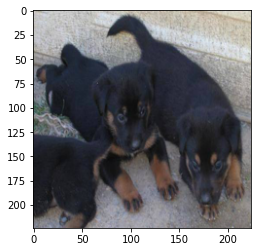

In [28]:
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

p = df["path"]
idx = random.randint(0, len(p)-1)
img = Image.open(p[idx]).resize((224, 224)).convert("RGB")
img_np = np.array(img)
img_np_pre = preprocess_input(img_np)
print(img_np_pre)
plt.imshow(img)